In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [2]:
%matplotlib inline

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [3]:
df = pd.read_csv("car_data.csv")

In [4]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [5]:
df.groupby('Make').count()

,Price,Mileage,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
Make,,,,,,,,,,,
Buick,80,80,80,80,80,80,80,80,80,80,80
Cadillac,80,80,80,80,80,80,80,80,80,80,80
Chevrolet,320,320,320,320,320,320,320,320,320,320,320
Pontiac,150,150,150,150,150,150,150,150,150,150,150
SAAB,114,114,114,114,114,114,114,114,114,114,114
Saturn,60,60,60,60,60,60,60,60,60,60,60


In [6]:
mileage = df.Mileage.to_frame()
price = df.Price.to_frame()

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lr = LinearRegression()

In [9]:
mileage_price = lr.fit(mileage, price)

In [10]:
mp_coef = mileage_price.coef_[0][0]

In [11]:
mp_int = mileage_price.intercept_[0]

In [12]:
print(mp_coef, mp_int)

-0.172520502791 24764.5590061


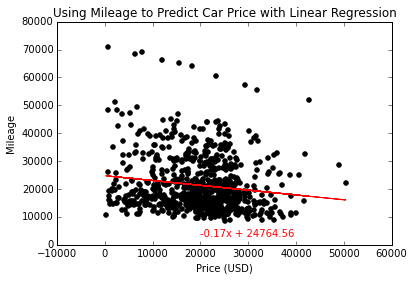

In [15]:
plt.scatter(mileage, price, color='black')
plt.plot(mileage, mileage_price.predict(mileage), color='red', linewidth=1)
plt.text(20000, 3000, '{:.2f}x + {:.2f}'.format(mp_coef, mp_int), color='red')
plt.title("Using Mileage to Predict Car Price with Linear Regression")
plt.xlabel("Price (USD)")
plt.ylabel("Mileage")
plt.show()

In [14]:
lr.score(mileage, price)

0.020463447323489481

In [16]:
# can't predict car price by mileage 

In [17]:
ind_var = df.loc[:, ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather')]

In [18]:
car_price = df.Price.to_frame()

In [19]:
lr = linear_model.LinearRegression()
car_regr = lr.fit(ind_var, car_price)
car_regr_score = lr.score(ind_var, car_price)
car_regr_score

0.4462643536728379

In [20]:
# still cant make predictions using all ind_var

In [21]:
import itertools
independent_vars = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
combos2 = list(itertools.combinations(independent_vars, 2))
combos3 = list(itertools.combinations(independent_vars, 3))
combos4 = list(itertools.combinations(independent_vars, 4))
combos5 = list(itertools.combinations(independent_vars, 5))
combos6 = list(itertools.combinations(independent_vars, 6))

In [22]:
combos = combos2 + combos3 + combos4 + combos5 + combos6

In [25]:
choices = []
def regression_for(combo):
    input_data = df[combo]
    price = df['Price']
    regr = linear_model.LinearRegression()
    regr.fit(input_data, price)
    return regr, regr.score(input_data, price)

for combo in combos:
    combo = list(combo)
    regr, score = regression_for(combo)
    choices.append((combo, score))
best5 = sorted(choices, key=lambda x: x[1])[-5:] 
print(best5)
best = sorted(choices, key=lambda x: x[1])[-1]
print(best)
regr, score = regression_for(best[0])
print(regr.coef_, regr.intercept_)

[(['Mileage', 'Cylinder', 'Cruise', 'Sound', 'Leather'], 0.43001820483252673), (['Mileage', 'Cylinder', 'Liter', 'Cruise', 'Sound', 'Leather'], 0.43014148406475605), (['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Leather'], 0.4369402151237245), (['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Leather'], 0.43780574153663798), (['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather'], 0.44569092105870245)]
(['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather'], 0.44569092105870245)
[ -1.70517079e-01   3.20012460e+03  -1.46339906e+03   6.20551127e+03
  -2.02440071e+03   3.32714331e+03] 7323.16430984


In [ ]:
#still not a very good predictor 